# Data project: Real GDP, Fertility rates and inflation 

# Introduction

In this project we examine the historical development of fertility, GDP and inflation. Furthermore, we look at the correlation between these variables. Fertility rates are an important demographic mesaure, refecting patterns in family planning, societal norms, and government policies. GDP is an important economic statistic representing the overall economic health and productivity for a country, which in this project is Denmark. Inflation rates also hold information about the economic health as it influences the purchasing power of the people. We get our data from Statistikbanken, where we use tabel FERT1, NAN1 and PRIS112. We have recalculated PRIS112 to inflationrates in Excel before importing them.

Imports 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
import dataproject as dp


# Importing and cleaning the data

The data is imported and cleaded using functions from the 'dataproject.py'. We structure and "clean" the data so we can make a more accurate analysis. we cleaned the data by removing unnecessary charaters and converting types, also merged it into a signle dataframe. We import the cleaned data in the following code:

In [2]:
data = dp.import_and_clean_data('FERTILITY.csv', 'GDP.csv', 'Inflation.csv')
data.head()

,Year,Fertilityrate,GrossDP,Inflationrate
0,2003,1759.9,1705.5,1.7
1,2004,1785.2,1751.0,0.9
2,2005,1802.1,1792.0,1.5
3,2006,1847.6,1862.1,1.6
4,2007,1843.5,1879.0,1.5


Above the merged data set is shown after we cleaned the data. we look at a period from 2003-2023.

# Descriptive statistics 

The descriptive statistic can help us understand the basic characteristics:

In [3]:
dp.descriptive_statistics(data)

Average GDP: 1948.5857142857142
Maximum GDP: 2315.2
Minimum GDP: 1705.5
Average Fertility Rate: 1743.1904761904766
Average Inflation Rate: 1.7761904761904763


- **Average GDP**: Represents the average level of economic output over the period studied. A generally healthier economy would normally have a  higher average GDP.
- **Maximum GDP**: Highest GDP in the period studied, could indicate the year with highest economic performance.
- **Minimum GDP**: Lowest GDP in the period studied could indicate a baseline for economic downturns.
- **Average Fertility Rate**: This rate gives insights into demographic trends, family planning, and potential future labor force size.
- **Average Inflation Rate**: This rate helps us understand the general price level changes and purchasing power over time.

A few points: 

1: Steady econonmic growth since after the financial crisis means that Denmark is substancially richer today compared to 20 years ago.

2: Historically, danish inflation has been low with an average inflation rate of 1.78% over the last 20 years.
    Highlights the dramatic increase in inflation up to 8% as a result of Covid-19, fiscal stimilus, supply shocks from the war in Ukraine etc.

### We can now look at correlations between the key variables: 

In [4]:
dp.correlations(data)

Correlation between GDP and Inflation Rate: 0.41515090844791264
Correlation coefficient between Fertilityrate and Real GDP: -0.7182484933911526
Correlation coefficient between Inflationrate and Fertilityrate: -0.41305188464056


A strongly positive correlation of 0.42 between GDP and inflation is what we expect to see over a longer period, where cyclical influences are less important. Higher GDP means higher economic activity leading to higher demand for goods and services which, all other things being equal, drives up the price level. 
Not clear from the correlation alone which way the causality runs. (Does GDP determine prices or vice versa?).

A strongly negative correlation of -0.71 indicates that as we get richer, we have fewer babies. Impossible to interpret this in a causal manner as too much information is left out. The correlation could be a result of a common confounder variable, affecting both real GDP and fertility rates. No strong theoretical foundation to interpret the correlation, unlike the previous correlation between real GDP and inflation, where we have a good theoretical idea of how we expect the variables to correlate. Possibel explanations could be increased living costs or shifting social preferences towards smaller families.

A negative correlation of -0.4 between inflation rates and fertility rates suggests that people have fewer babies when prices are high. This could make some theoretical sense as babies in an economic setting come with a cost, which is harder to bear during periods of high inflation. Meaning that uncertainty in the economy could lead to families leading towards smaller families or waiting to less uncertain times before expanding the family. As before, however, it is not possible to interpret this correlation in a causal manner due to the myriad of other variables that might explain the movement in both fertility rates and inflation rates.

# Plotting the data

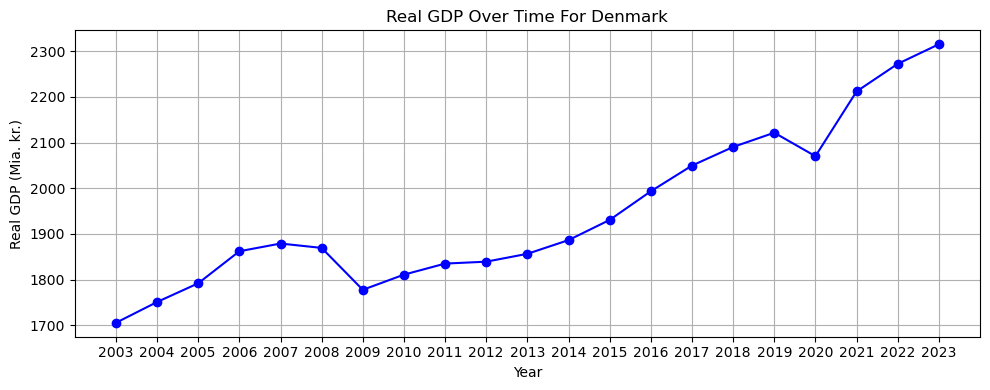

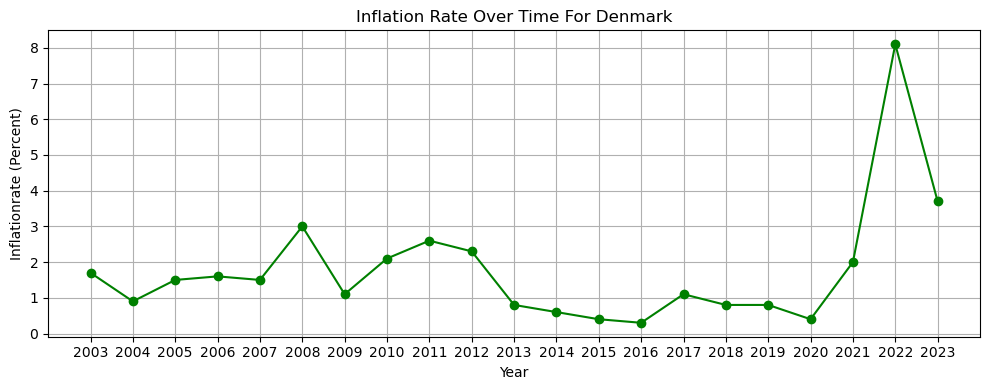

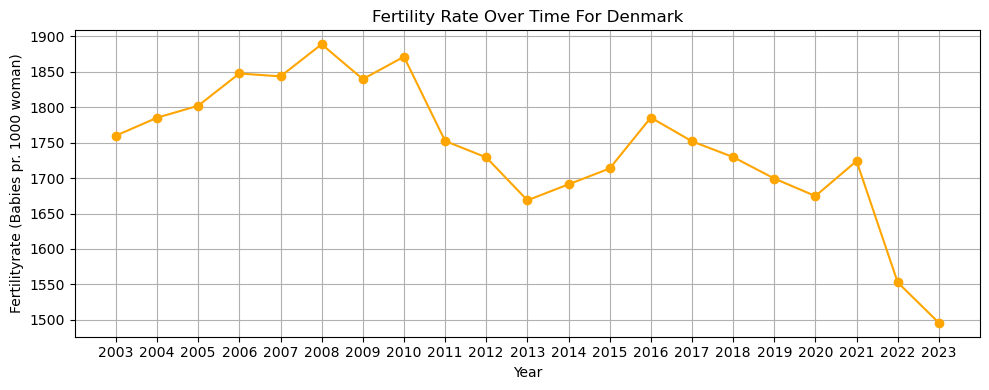

In [5]:
dp.create_plots(data)

- **GDP Over Time**: Observing the GDP over time for Denmark allows us to identify periods of economic growth and recession. We see a steady increase in GDP, this suggests a growing economy, while there have been some few economic declines at the financial crisis in 2009 and covid-19 in 2019.
- **Inflation Rate Over Time**: Observing the inflation rate over time for Denmark allows us to understand periods of high and low price stability. Sudden spikes in inflation rate can indicate a uncertain economy or supply shocks.
- **Fertility Rate Over Time**: Observing the fertility rate over time for Denmark provide us with an insight into demographic changes and potential future shifts in the labor market. We see a decline in the fertility rate, which could indicate an overall aging population. 

### Interactive plot to explore relationships in the data

In [6]:
dp.interactive_plot(data)

From the interactive plot you can examine different levels of inflation and GDP relate to fertility rates across different years and have these may effect eachother. 

# Looking at Annual GDP Growth Rate and Fertility Rate per Woman over time

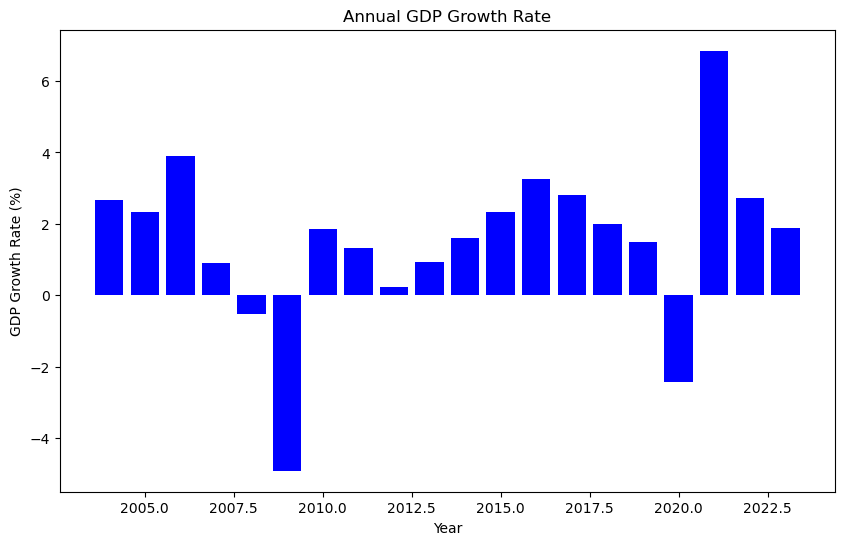

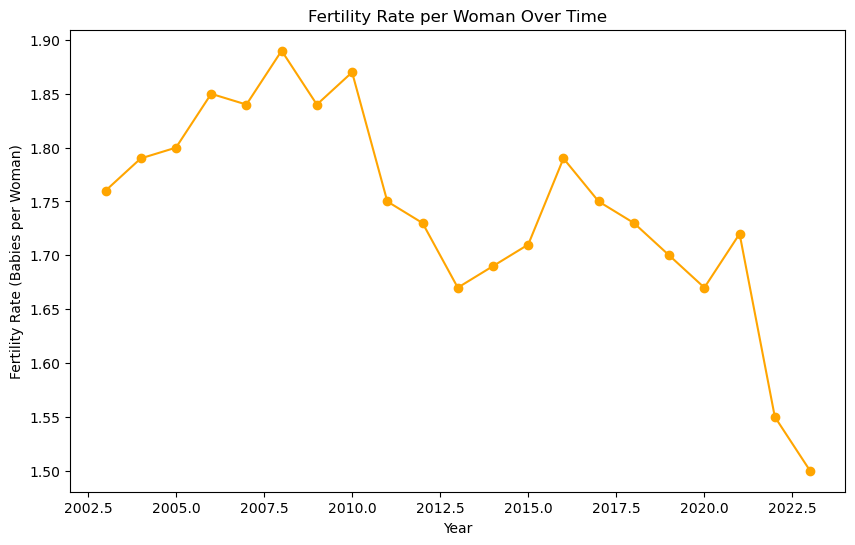

In [7]:
dp.visualize_tables(data)

**Annual GDP Growth Rate**: Danish yearly GDP growth has generally been 1-2% over the last 20 years. Negative growth in periods of turmoil like the 2008 crisis or Covid-19.

**Fertility Rate per Woman Over Time**: As seen above, the fertility rate is consistently below 2 babies pr. woman, which is the number needed to sustain a constant population without immigration. Furthermore, there is quite a substantial drop of around 0.3 babies pr. woman from 2004 to 2023. 
Not possible to determine causes from these data alone.
Unclear what the effects of low fertility rates are on economic growth. Could slow growth if less people born means less new ideas produced(less R&D).

# Trend analysis

Performing trend analysis and displaying the results. the trend analysis is revealing the underlying patterns in the data.

In [8]:
dp.trend_analysis(data)

Trend Analysis for GDP: Slope=26.024285714285714, Intercept=-50438.30142857143, R-squared=0.8514766461118793
Trend Analysis for Inflation: Slope=0.06974025974025974, Intercept=-138.6109523809524, R-squared=0.06415166395508011
Trend Analysis for Fertility Rate: Slope=-11.62194805194805, Intercept=25138.1719047619, R-squared=0.5498632420206622


# Conclusion

In the project, we have analyzed GDP, inflation and fertility rate. We have tried to indentify trends and patterns. We did this through:
- Descriptive statistics of dataset 
- Made a visualizaiton of important economic trends 
- an interactive plit 
- Trend analysis of the data. 
This analysis provide insights into different economic phenomenas. The study is basic and would require further reseach. Some points, we find are Real GDP has grown steadily over the last 20 years. Interrupted by recessions in 2008 and 2020. Inflation has historically been consistent around 2% but jumped to 8% in 2022 after several shocks to the economy. Currently, the inflation is heading down. Unclear how sticky the increased inflation will be. Fertility rates have been decreasing over the last 20 years. The decrease is significant since the leves 20 years ago were already low. The current level of 1.5 babies pr. woman is far below the 2.1 needed for a constant population. Interesting to speculate on the effect this might have on economic growth in the longer run.

Real GDP and inflation have a strong positive correlation which matches the theoretical preditiction of how these two variables should comove. We find a strongly negative correlation between real GDP and fertility rates, and between fertility rates and inflation rates. Impossible to interpret this in a causal manner. 